In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
import io

# (1) Preliminary EDA: Total Dataset

In [9]:
# Total dataframe with 81,544 observatins from Q1 2016. 
# 60,430 Fully Paid observations and 21,114 Charged Off observations
master = pd.read_csv('LC2016Q1_v2_copy.csv', skiprows=0)
master = master.sample(frac=0.1)

In [67]:
# master.columns

In [69]:
master['zip_code'] = master['zip_code'].astype(str)

for i in range(0, len(master)):
    if len(master.iloc[i]['zip_code']) == 2:
        master.iloc[i,12] = '0' + master.iloc[i,12]

In [70]:
race = pd.read_csv('Race_by_zip_final.csv')
race = race.drop('Unnamed: 0',axis=1)
race['Zip Code'] = race['Zip Code'].astype(str)

In [71]:
interest_rates = []
black_props = []

for row in range(0,4):
    interest_rate = master.iloc[row]['int_rate']
    interest_rates.append(interest_rate)
    
    race_row = race[race['Zip Code'] == master.iloc[row]['zip_code']]
    proportion = race_row['Black Proportion'].values
    black_props.append(float(proportion))

In [76]:
# race[race['Zip Code'] == master.iloc[4]['zip_code']]

sum(race['Zip Code'] == '080')

0

In [39]:
master.iloc[4]['zip_code']

80

In [ ]:
race_row = race[race['Zip Code'] == master.iloc[0]['zip_code']]
race_row

# (2) Investing Deepdive: Fully Paid vs. Charged Off

In [2]:
# Dataset of 40,000 observations, with 20,0000 from 
df = pd.read_csv('EDA_sample.csv')

In [3]:
# df.columns.get_loc('revol_util')

In [5]:
fp = df[df['loan_status'] == 'Fully Paid']
cf = df[df['loan_status'] == 'Charged Off']

In [8]:
# Code to download CSV's

# import csv
# with open("EDA_sample.csv","w") as out:
#     out.write(EDA_sample.to_csv())

In [9]:
dfe = df.copy()

# dfe['int_rate'] = dfe['int_rate'].apply(lambda x: x.strip('%'))
# dfe['revol_util'].apply(lambda x: x.strip('%'))

dfe['revol_util'].isnull().values.any()

False

In [15]:
mean_dti = np.mean(dfe['dti'])
dfe['dti'] = dfe['dti'].fillna(mean_dti)
# Column of incomes under 200000
dfe['income_200'] = dfe['annual_inc'][dfe['annual_inc'] < 200000]
# Column of dti's under 100
dfe['dti_100'] = dfe['dti'][dfe['dti'] < 100]

In [16]:
dfe.columns.get_loc('dti_100')

80

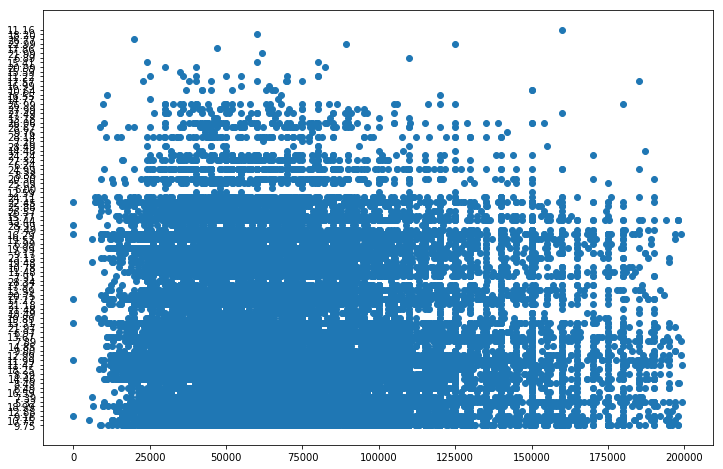

In [17]:
f = plt.figure(figsize=(12,8))
plt.scatter(x=dfe.iloc[:,79], y=dfe.iloc[:,4])
plt.show()

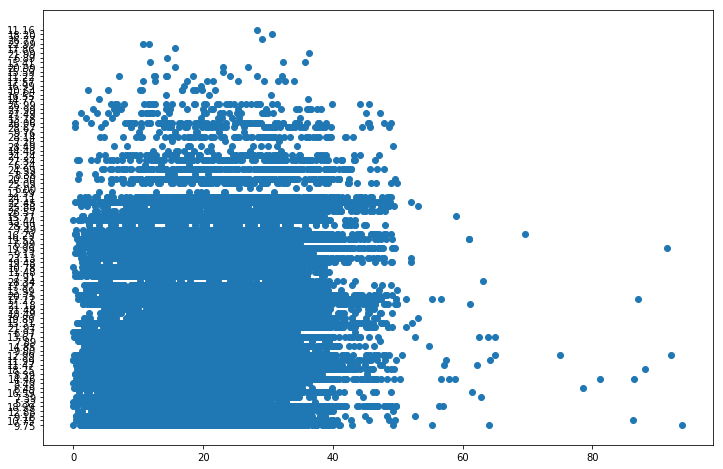

In [18]:
f = plt.figure(figsize=(12,8))
plt.scatter(x=dfe.iloc[:,80], y=dfe.iloc[:,4])
plt.show()

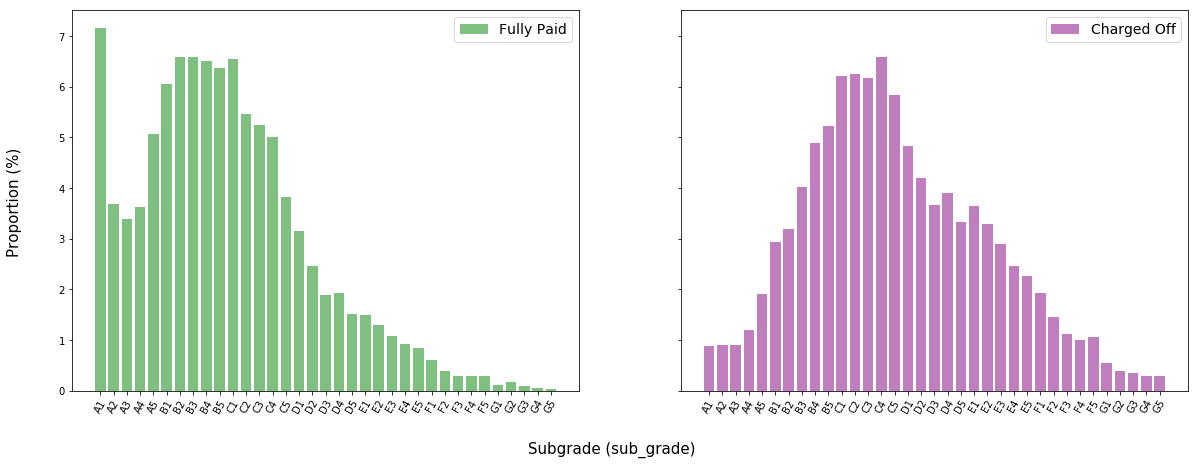

In [19]:
# Subgrade distribution
fpsg = fp.iloc[:,6]
cfsg = cf.iloc[:,6]

# Fully Paid Subgrade Counts
dict_fpsg = fpsg.value_counts()
keys_fpsg = sorted(dict_fpsg.keys())
dict_fpsg = OrderedDict((key,dict_fpsg[key]) for key in keys_fpsg)
dict_fpsg.update((x, y/200) for x, y in dict_fpsg.items())

# Charged Off Subgrade Counts
dict_cfsg = cfsg.value_counts()
keys_cfsg = sorted(dict_cfsg.keys())
dict_cfsg = OrderedDict((key,dict_cfsg[key]) for key in keys_cfsg)
dict_cfsg.update((x, y/200) for x, y in dict_cfsg.items())

# Plot
f, sp = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(20,7))

sp[0].bar(dict_fpsg.keys(), dict_fpsg.values(), color = 'g', alpha = 0.5)
sp[0].legend(['Fully Paid'],prop={'size': 14})
sp[1].bar(dict_cfsg.keys(), dict_cfsg.values(), color = 'purple', alpha=0.5)
sp[1].legend(['Charged Off'],prop={'size': 14})
    
for tick in sp[0].get_xticklabels():
    tick.set_rotation(60)
for tick in sp[1].get_xticklabels():
    tick.set_rotation(60)
    
f.text(0.5, 0, 'Subgrade (sub_grade)', ha='center',size=15)
f.text(0.08, 0.5, 'Proportion (%)', va='center', rotation='vertical',size=15)

plt.show()

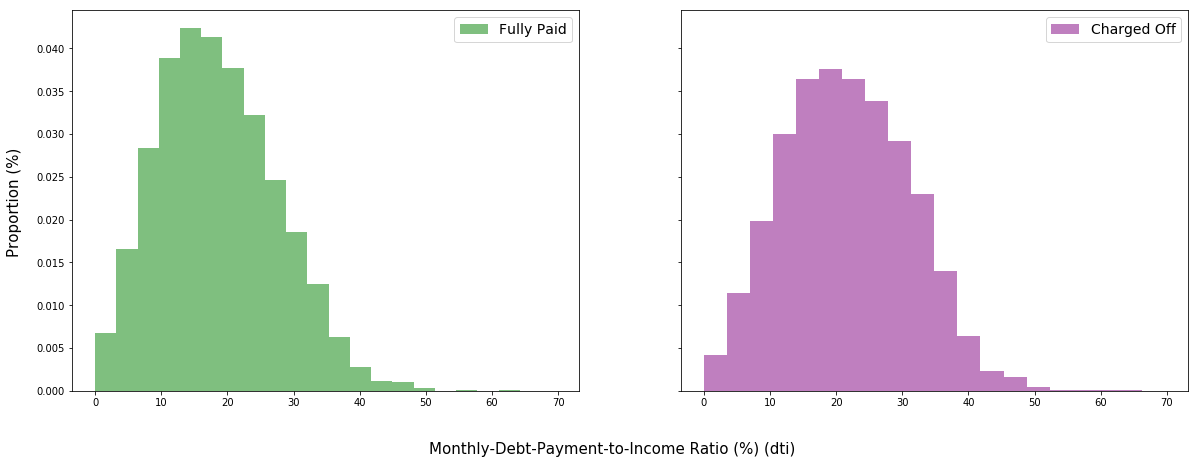

In [20]:
from collections import OrderedDict

# Extract DTI ratios below 70 for plotting (i.e. the vast majority)
fpdti = fp.iloc[:]['dti'].dropna()
fpdti = fpdti[fpdti<70]
cfdti = cf.iloc[:]['dti'].dropna()
cfdti = cfdti[cfdti<70]

# Plot
f, sp = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(20,7))

sp[0].hist(fpdti, color = 'g', alpha = 0.5,bins=20,density=True)
sp[0].legend(['Fully Paid'],prop={'size': 14})
sp[1].hist(cfdti, color = 'purple', alpha=0.5,bins=20,density=True)
sp[1].legend(['Charged Off'],prop={'size': 14})

f.text(0.5, 0, 'Monthly-Debt-Payment-to-Income Ratio (%) (dti)', ha='center',size=15)
f.text(0.08, 0.5, 'Proportion (%)', va='center', rotation='vertical',size=15)

plt.show()

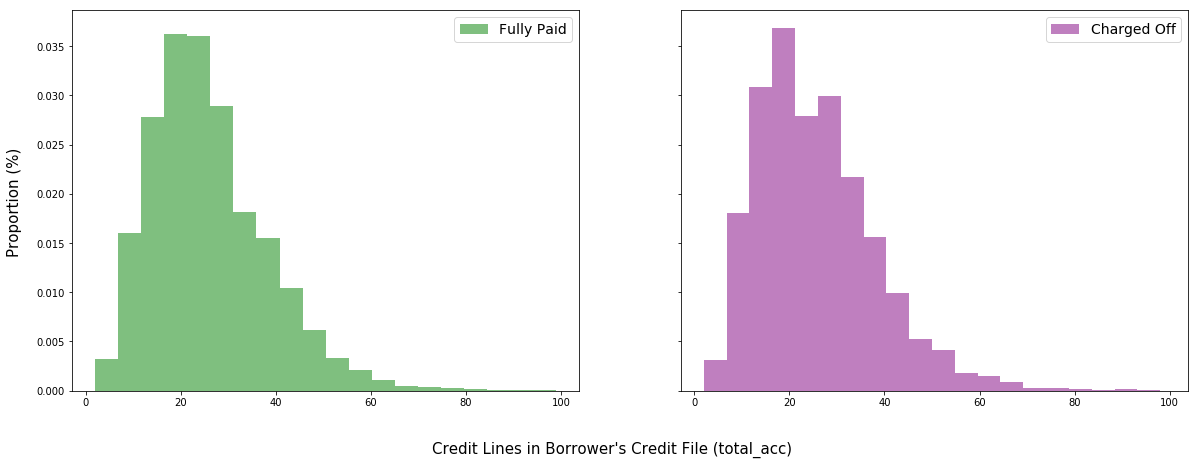

In [21]:
# Extract total number of credit lines currently in the borrower's credit file
fpta = fp.iloc[:]['total_acc'].dropna()
fpta = fpta[fpta<100]
cfta = cf.iloc[:]['total_acc'].dropna()
cfta = cfta[cfta<100]

# Plot
f, sp = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(20,7))

sp[0].hist(fpta, color = 'g', alpha = 0.5,bins=20,density=True)
sp[0].legend(['Fully Paid'],prop={'size': 14})
sp[1].hist(cfta, color = 'purple', alpha=0.5,bins=20,density=True)
sp[1].legend(['Charged Off'],prop={'size': 14})
    
f.text(0.5, 0, "Credit Lines in Borrower's Credit File (total_acc)", ha='center',size=15)
f.text(0.08, 0.5, 'Proportion (%)', va='center', rotation='vertical',size=15)

plt.show()

In [19]:
for i in df['revol_util'].index:
    if pd.isnull(df['revol_util'][i]):
        df.iloc[i,21] = '0'
        
df['revol_util'] = df['revol_util'].apply(lambda x: x.strip('%'))

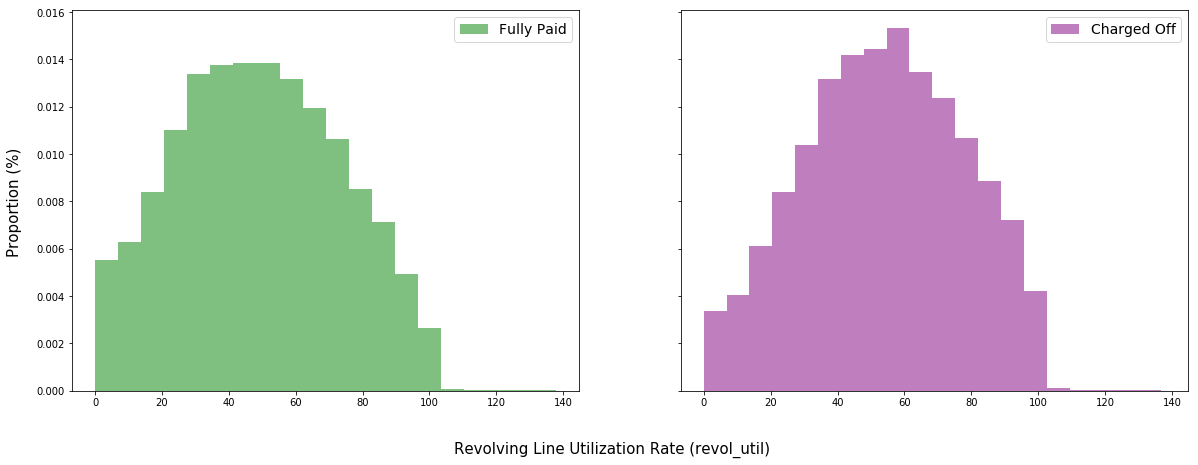

In [18]:
# Total credit revolving balance
fpru = fp.iloc[:]['revol_util'].astype(float)
# fprb = fprb[fprb<200000]
cfru = cf.iloc[:]['revol_util'].astype(float)
# cfrb = cfrb[cfrb<200000]

# Plot
f, sp = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(20,7))

sp[0].hist(fpru, color = 'g', alpha = 0.5,bins=20,density=True)
sp[0].legend(['Fully Paid'],prop={'size': 14})
sp[1].hist(cfru, color = 'purple', alpha=0.5,bins=20,density=True)
sp[1].legend(['Charged Off'],prop={'size': 14})

f.text(0.5, 0, "Revolving Line Utilization Rate (revol_util)", ha='center',size=15)
f.text(0.08, 0.5, 'Proportion (%)', va='center', rotation='vertical',size=15)

plt.show()

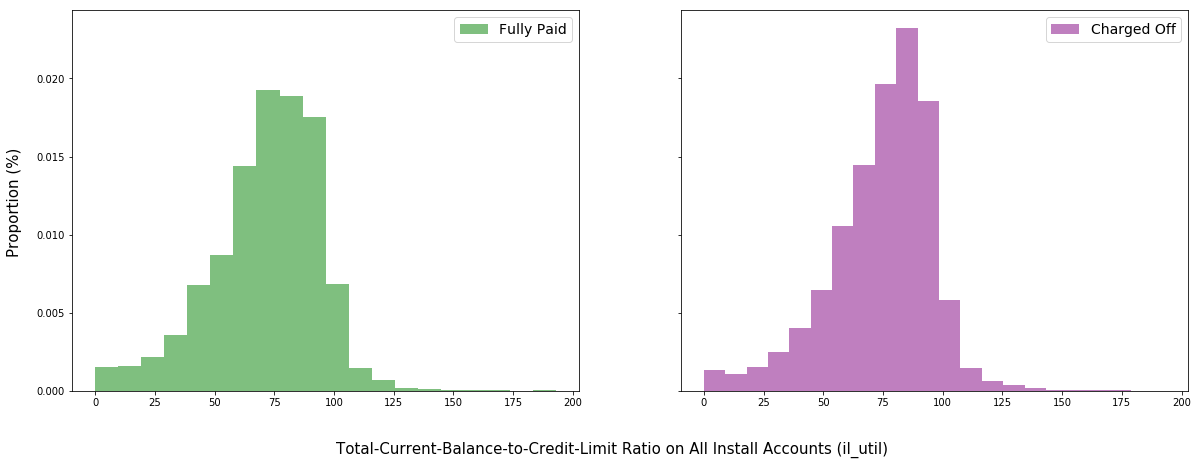

In [180]:
# Total credit revolving balance
fpiu = fp.iloc[:]['il_util'].dropna()
fpiu = fpiu[fpiu<200]
cfiu = cf.iloc[:]['il_util'].dropna()
cfiu = cfiu[cfiu<200]

# Plot
f, sp = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(20,7))

sp[0].hist(fpiu, color = 'g', alpha = 0.5,bins=20,density=True)
sp[0].legend(['Fully Paid'],prop={'size': 14})
sp[1].hist(cfiu, color = 'purple', alpha=0.5,bins=20,density=True)
sp[1].legend(['Charged Off'],prop={'size': 14})

f.text(0.5, 0, "Total-Current-Balance-to-Credit-Limit Ratio on All Install Accounts (il_util)", ha='center',size=15)
f.text(0.08, 0.5, 'Proportion (%)', va='center', rotation='vertical',size=15)

plt.show()

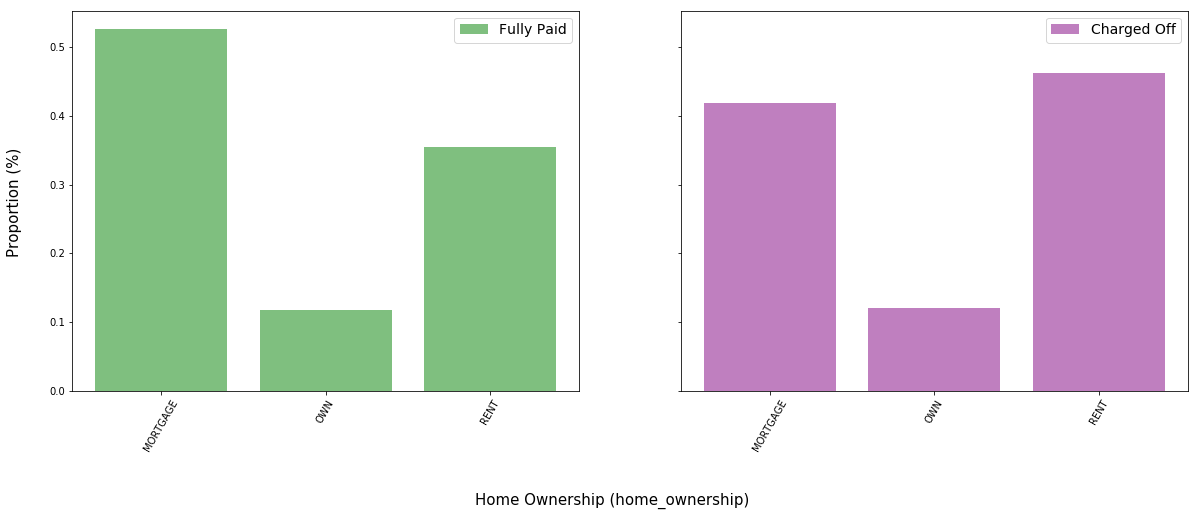

In [173]:
fphome = fp.iloc[:,8]
cfhome = cf.iloc[:,8]

dict_fphome = fphome.value_counts()
keys_fphome = sorted(dict_fphome.keys())
dict_fphome = OrderedDict((key,dict_fphome[key]) for key in keys_fphome)
dict_fphome.update((x, y/20000) for x, y in dict_fphome.items())

dict_cfhome = cfhome.value_counts()
keys_cfhome = sorted(dict_cfhome.keys())
dict_cfhome = OrderedDict((key,dict_cfhome[key]) for key in keys_cfhome)
dict_cfhome.update((x, y/20000) for x, y in dict_cfhome.items())

# Plot
f, sp = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(20,7))

sp[0].bar(dict_fphome.keys(), dict_fphome.values(), color = 'g', alpha = 0.5)
sp[0].legend(['Fully Paid'],prop={'size': 14})
sp[1].bar(dict_cfhome.keys(), dict_cfhome.values(), color = 'purple', alpha=0.5)
sp[1].legend(['Charged Off'],prop={'size': 14})

for tick in sp[0].get_xticklabels():
    tick.set_rotation(60)
for tick in sp[1].get_xticklabels():
    tick.set_rotation(60)
    
f.text(0.5, -0.1, 'Home Ownership (home_ownership)', ha='center',size=15)
f.text(0.08, 0.5, 'Proportion (%)', va='center', rotation='vertical',size=15)

plt.show()

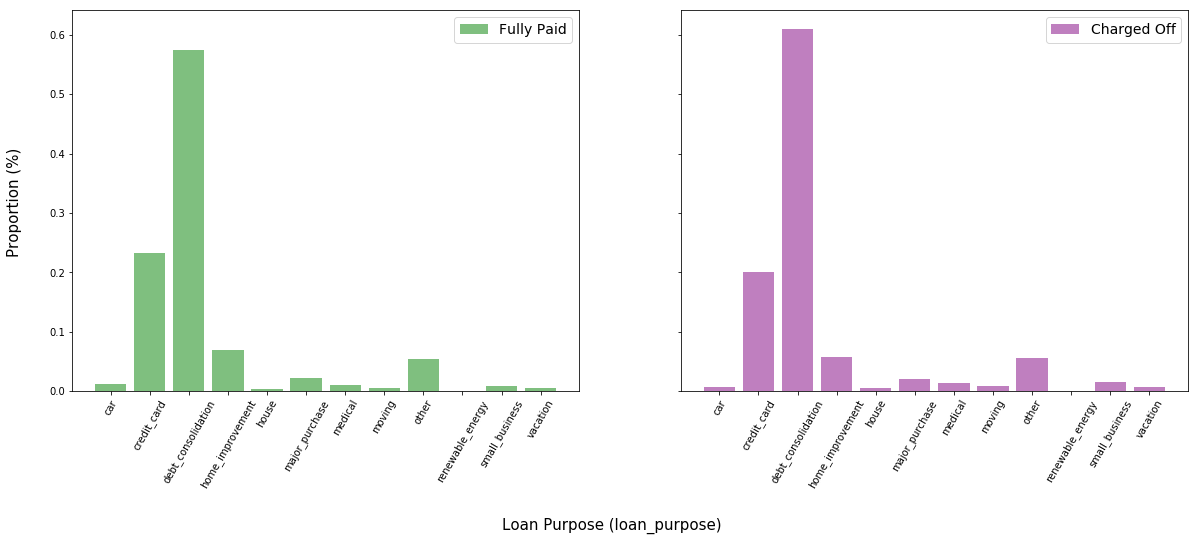

In [174]:
fppurp = fp.iloc[:,12]
cfpurp = cf.iloc[:,12]

dict_fppurp = fppurp.value_counts()
keys_fppurp = sorted(dict_fppurp.keys())
dict_fppurp = OrderedDict((key,dict_fppurp[key]) for key in keys_fppurp)
dict_fppurp.update((x, y/20000) for x, y in dict_fppurp.items())

dict_cfpurp = cfpurp.value_counts()
keys_cfpurp = sorted(dict_cfpurp.keys())
dict_cfpurp = OrderedDict((key,dict_cfpurp[key]) for key in keys_cfpurp)
dict_cfpurp.update((x, y/20000) for x, y in dict_cfpurp.items())

# Plot
f, sp = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(20,7))

sp[0].bar(dict_fppurp.keys(), dict_fppurp.values(), color = 'g', alpha = 0.5)
sp[0].legend(['Fully Paid'],prop={'size': 14})
sp[1].bar(dict_cfpurp.keys(), dict_cfpurp.values(), color = 'purple', alpha=0.5)
sp[1].legend(['Charged Off'],prop={'size': 14})
    
for tick in sp[0].get_xticklabels():
    tick.set_rotation(60)
for tick in sp[1].get_xticklabels():
    tick.set_rotation(60)
    
f.text(0.5, -0.15, 'Loan Purpose (loan_purpose)', ha='center',size=15)
f.text(0.08, 0.5, 'Proportion (%)', va='center', rotation='vertical',size=15)

plt.show()